## スペクトルの比較

"Relative I/F"（相対的な反射率）は、スペクトル解析において特定の波長または周波数での相対的な反射率を表すために使用される用語です。相対的な反射率を計算するには、以下の一般的な手順が適用されます：

1. **スペクトルデータの収集**: まず、対象物体や試料からの光または放射線のスペクトルデータを収集します。これは通常、波長または周波数に対する強度の測定です。このデータは、スペクトロメータや分光器などの装置を使用して収集されます。

2. **基準となる反射率の取得**: 相対的な反射率を計算するためには、基準となる反射率を持つ材料または条件を必要とすることが一般的です。これは、スペクトルデータの比較基準として使用されます。基準材料は、特定の波長または周波数での反射率が既知である必要があります。

3. **相対的な反射率の計算**: 相対的な反射率は、次の数式を使用して計算されることがあります：

   相対的な反射率（Relative I/F） = （対象のスペクトルデータ） / （基準のスペクトルデータ）

   ここで、対象のスペクトルデータは対象物体や試料から収集したスペクトルデータであり、基準のスペクトルデータは基準材料または条件から収集したスペクトルデータです。

4. **データの調整と正規化**: 必要に応じて、相対的な反射率データを調整または正規化することがあります。これにより、データの比較や解釈が容易になります。

5. **解析と視覚化**: 最終的に、計算された相対的な反射率データを解析し、必要に応じてグラフ化して視覚化します。これにより、特定の波長や周波数での反射率の相対的な変化がわかり、対象物体や試料の性質や組成に関する情報を抽出できます。

この手順は一般的な相対的な反射率の計算方法ですが、具体的なアプリケーションや研究目的に応じて異なる方法や調整が必要となることがあります。また、基準材料の選定やデータ処理の詳細は、具体的な実験条件に依存するため、注意が必要です。

---

In [3]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


---
複数のデータをプロット

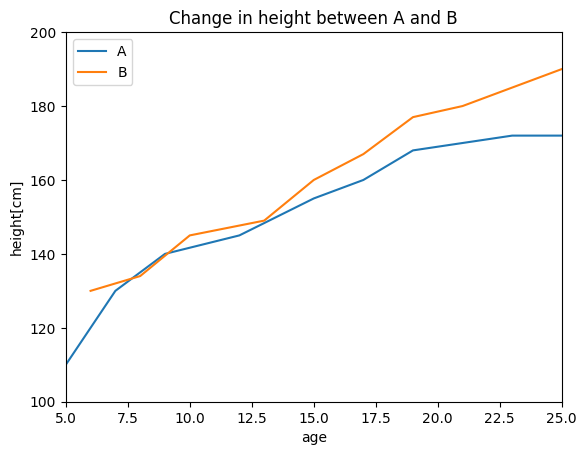

In [4]:
#matplotlibのライブラリ
import matplotlib.pyplot as plt

#x軸とx軸を設定
X1 = [5,7,9,12,15,17,19,21,23,25]
X2 = [6,8,10,13,15,17,19,21,23,25]
Y1 = [110,130,140,145,155,160,168,170,172,172]
Y2 = [130,134,145,149,160,167,177,180,185,190] #New 新たなデータを追加

#x軸ラベル
plt.xlabel("age")
#y軸ラベル
plt.ylabel("height[cm]")

#x軸範囲を指定（最小値、最大値）
plt.xlim(5,25)
#y軸範囲を指定（最小値、最大値）
plt.ylim(100,200)

#グラフタイトル
plt.title("Change in height between A and B")

#グラフのプロット
plt.plot(X1, Y1, label="A")  #2つのグラフを区別のため「ラベル」付与
plt.plot(X2, Y2, label="B") 

plt.legend() #凡例を表示
plt.show()

---
折れ線グラフ上で、存在しない座標について、指定したx座標からy座標を計算。

In [5]:
import numpy as np

x = [1,2,3,4,5]
y = [10,15,7,12,9]

# 指定したx座標
target_x = 0

# 指定したx座標に最も近いデータ点を見つける
closeset_index = np.argmin(np.abs(np.array(x) - target_x))

# 補間計算を行う
if closeset_index < len(x) - 1:
    x1, x2 = x[closeset_index], x[closeset_index +1]
    y1, y2 = y[closeset_index], y[closeset_index +1]
    target_y = y1 + (target_x - x1) * (y2 - y1) / (x2 -x1)
else:
    target_y = y[closeset_index]

print(f"x:{target_x}, y:{target_y}")


x:0, y:5.0


---
get_spectral関数を再作成

                reflectance
wavelength[μm]             
1.00135                 NaN
1.00790                 NaN
1.01445             0.04965
1.02100             0.04932
1.02755             0.04749
...                     ...
3.91011             0.05505
3.91679             0.05382
3.92347             0.06155
3.93015                 NaN
3.93682                 NaN

[437 rows x 1 columns]


<AxesSubplot: xlabel='wavelength[μm]'>

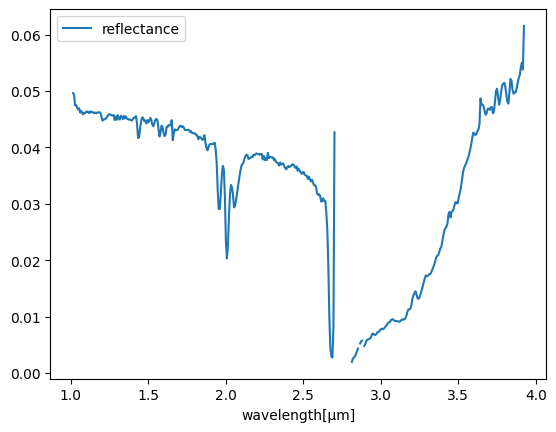

In [75]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# csvからスペクトルをndarrayで取得
def get_spectral(csvfile):
    df = pd.read_csv(csvfile)
    np_list = df[2:].to_numpy()
    return (np_list[:, 0], np_list[:, 1])

# ref = get_spectral('frt00003621_07_if166l_E_-97.66602_N_24.89830.csv')
# plt.plot(ref[0], ref[1])
# target = get_spectral('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv')
# plt.plot(target[0], target[1])

# print(ref)
df = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
print(df)
df.plot()
# df.plot(x='wavelength[μm]', y='reflectance')


---
normalization, standardization関数を再作成

                reflectance  normalization  standardization
wavelength[μm]                                             
1.00135                 NaN            NaN              NaN
1.00790                 NaN            NaN              NaN
1.01445             0.04965       0.800235         1.108574
1.02100             0.04932       0.794695         1.084921
1.02755             0.04749       0.763975         0.953756
...                     ...            ...              ...
3.91011             0.05505       0.890885         1.495620
3.91679             0.05382       0.870237         1.407460
3.92347             0.06155       1.000000         1.961508
3.93015                 NaN            NaN              NaN
3.93682                 NaN            NaN              NaN

[437 rows x 3 columns]
                reflectance  normalization  standardization
wavelength[μm]                                             
1.00135                 NaN            NaN              NaN
1.00790         

<AxesSubplot: xlabel='wavelength[μm]'>

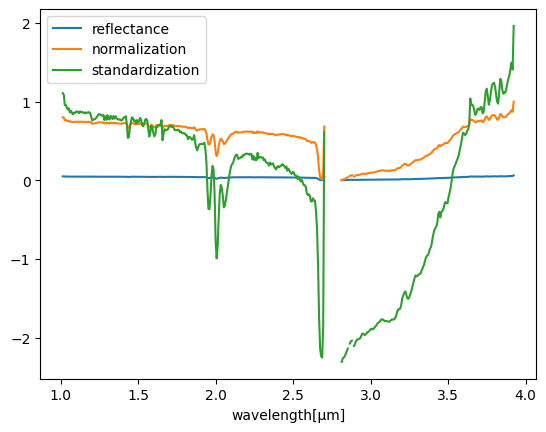

In [77]:
ref = get_spectral('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv')
target = get_spectral('frt00003621_07_if166l_E_-97.57339 N_24.96872.csv')
# print(ref[1], target[1])
# print(ref[0].size, target[0].size)

# 正規化 min0-max1　[Min-Max normalization = Normalization] (引数：ndarrayの2次元配列)
# def normalization(ref):
#     result = (ref[1] - np.nanmin(ref[1])) / (np.nanmax(ref[1]) - np.nanmin(ref[1]))
#     return (ref[0], result)
def normalization(df):
    result = (df["reflectance"] - np.nanmin(df["reflectance"])) / (np.nanmax(df["reflectance"]) - np.nanmin(df["reflectance"]))
    df.loc[:, "normalization"] = result
    return df

# 標準化 mean0-variance1 [Z-score normalization = Standardization] (引数：ndarrayの2次元配列)
# def standardization(ref):
#         result = (ref[1] - np.nanmean(ref[1])) / np.nanstd(ref[1])
#         return (ref[0], result)
def standardization(df):
        result = (df["reflectance"] - np.nanmean(df["reflectance"])) / np.nanstd(df["reflectance"])
        df.loc[:, "standardization"] = result
        return df

# 相対反射率 (Relative I/F)
# def relative_reflectance(ref_base, ref_target):
#     result = ref_base[1] / ref_target[1]
#     return (ref_base[0], result)
def relative_reflectance(df_base, df_target):
    result = ref_base["reflectance"] / ref_target["reflectance"]
    return (ref_base["wavelength[µm]"], result)

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.57339 N_24.96872.csv', index_col=0)
# print(df1)
# print(df2)
normalization(df1)
normalization(df2)
standardization(df1)
standardization(df2)
print(df1)
print(df2)
df1.plot()

# plt.figure()
# plt.plot(res1[0], res1[1], label='ref1')
# plt.plot(res2[0], res2[1], label='ref2')
# plt.legend()

# res1 = normalization(ref)
# res2 = normalization(target)
# plt.figure()
# plt.plot(res1[0], res1[1], label='ref1')
# plt.plot(res2[0], res2[1], label='ref2')
# plt.legend()

# plt.figure()
# res1 = standardization(ref)
# plt.plot(res1[0], res1[1])
# res2 = standardization(target)
# plt.plot(res2[0], res2[1])

# plt.figure()
# res1 = relative_reflectance(ref, target)
# plt.plot(res1[0], res1[1])



---
moving_avg関数を再作成

                reflectance  moving_avg_size4
wavelength[μm]                               
1.00135                 NaN               NaN
1.00790                 NaN               NaN
1.01445             0.04965               NaN
1.02100             0.04932               NaN
1.02755             0.04749          0.048500
...                     ...               ...
3.91011             0.05505          0.053975
3.91679             0.05382          0.056145
3.92347             0.06155               NaN
3.93015                 NaN               NaN
3.93682                 NaN               NaN

[437 rows x 2 columns]


wavelength[μm]
1.00135         NaN
1.00790         NaN
1.01445         NaN
1.02100         NaN
1.02755    0.095990
             ...   
3.91011    0.109025
3.91679    0.109965
3.92347         NaN
3.93015         NaN
3.93682         NaN
Length: 437, dtype: float64

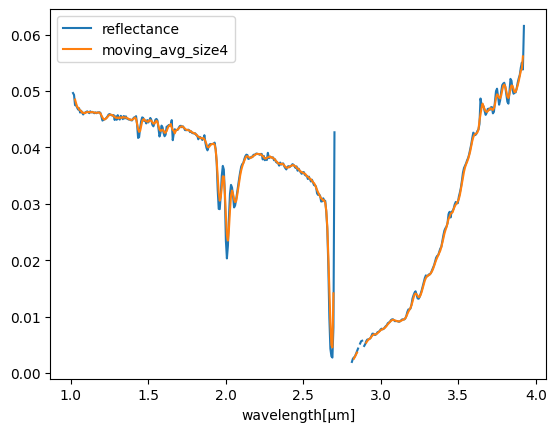

In [94]:
# !pip3 install math
import math

# 移動平均 refに対してsize個での移動平均を取る (引数：ndarrayの2次元配列)
# def moving_avg(ref, size):
#     b = np.ones(size)/size
#     ref_mean = np.convolve(ref, b, mode="same")
#     n_conv = math.ceil(size/2)
    
#     # 補正部分、始めと終わり部分をsizeの半分で移動平均を取る
#     ref_mean[0] *= size/n_conv
#     for i in range(1, n_conv):
#         ref_mean[i] *= size/(i+n_conv)
#         ref_mean[-i] *= size/(i + n_conv - (size % 2)) 
# 	# size%2は奇数偶数での違いに対応するため

#     return ref_mean

def moving_avg(df, size):
    b = np.ones(size)/size
    ref_mean = np.convolve(df["reflectance"], b, mode="same")
    n_conv = math.ceil(size/2)
    
    # 補正部分、始めと終わり部分をsizeの半分で移動平均を取る
    ref_mean[0] *= size/n_conv
    for i in range(1, n_conv):
        ref_mean[i] *= size/(i+n_conv)
        ref_mean[-i] *= size/(i + n_conv - (size % 2)) # size%2は奇数偶数での違いに対応するため

    column_name = 'moving_avg_size' + str(size)
    df.loc[:, column_name] = ref_mean
    return df

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
moving_avg(df1, 4)
print(df1)
df1.plot()
# df1.loc[:, :]
df1.sum(axis='columns', skipna=False)

# ref = get_spectral('frt00003621_07_if166l_E_-97.66602_N_24.89830.csv')
# ref_mean = moving_avg(ref[1], 5)
# plt.plot(ref[0], ref_mean)

---
stacking関数を再作成

Number of reflectance:  3
                stacking  reflectance  reflectance  reflectance
wavelength[μm]                                                 
1.00135              NaN          NaN          NaN          NaN
1.00790              NaN          NaN          NaN          NaN
1.01445         0.168050      0.04965      0.24651      0.20799
1.02100         0.166843      0.04932      0.24686      0.20435
1.02755         0.162177      0.04749      0.24014      0.19890
...                  ...          ...          ...          ...
3.91011         0.198960      0.05505      0.31369      0.22814
3.91679         0.195637      0.05382      0.31034      0.22275
3.92347              NaN      0.06155          NaN          NaN
3.93015              NaN          NaN          NaN          NaN
3.93682              NaN          NaN          NaN          NaN

[437 rows x 4 columns]
                reflectance
wavelength[μm]             
1.00135                 NaN
1.00790                 NaN
1.0144

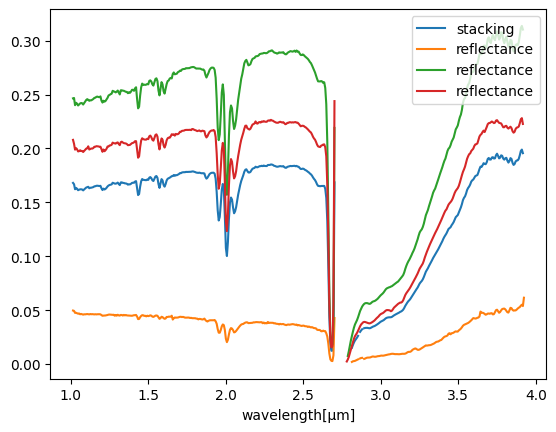

In [127]:

# スタッキング (引数：ndarrayの3次元配列)
# def stacking(ref_3d_array):
#     length_2d = len(ref_3d_array)
#     for i in range(length_2d - 1):
#         ref_sum = (ref_3d_array[i][1] + ref_3d_array[i+1][1])
#     result = ref_sum / length_2d
#     df = pd.DataFrame(
#         data = {"stacking": result}
#         )
#     return df

def stacking(df_list, info='false'):
    df_collect = pd.concat(df_list, axis='columns')
    df_stacking = df_collect.copy()
    columns = df_collect.shape[1]
    df_sum = df_collect.sum(axis='columns', skipna=False)
    result = df_sum / columns
    df_stacking.insert(0, 'stacking', result)
    if info == 'true':
        print('Number of reflectance: ', columns)
        print(df_stacking)
        df_stacking.plot()
    return df_stacking

df1 = pd.read_csv('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv', index_col=0)
df2 = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv', index_col=0)
df3 = pd.read_csv('frt00003621_07_if166l_E_-97.59741 N_24.89991.csv', index_col=0)
df_list = [df1, df2, df3]
df_stacking = stacking(df_list, info='true')

# df_res = stacking(df_sum)
# print(df1, '\n', df2, '\n', df3, '\n', df_res)

# ref0 = get_spectral('frt00003621_07_if166l_E_-97.66602_N_24.89830.csv')
# ref1 = get_spectral('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv')
# ref = np.stack((ref0, ref1))
# res = stacking(ref)

# plt.figure()
# # plt.plot(ref[0][0], res, label='result')
# plt.plot(ref[0][0], ref[0][1], label='ref0')
# plt.plot(ref[0][0], ref[1][1], label='ref1')
# # plt.plot(ref[0][0], ref[2][1], label='ref2')
# plt.legend()


---

In [21]:
ref0 = get_spectral('frt00003621_07_if166l_E_-97.66602_N_24.89830.csv')
ref1 = get_spectral('frt0000ca5b_07_if164l_E_-92.86192_N_-7.60157.csv')
np.corrcoef(ref0[1], ref1[1])

array([[nan, nan],
       [nan, nan]])

In [80]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([3, 4, 5], index=['c', 'd', 'e'])
s3 = pd.Series([3, 4, 5, 6], index=['c', 'd', 'e', 'f'])

s1 + s2 + s3

a     NaN
b     NaN
c     9.0
d    12.0
e     NaN
f     NaN
dtype: float64